In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import geopandas as gpd
import os, sys

 
sys.path.append(os.path.dirname(os.getcwd()))
from scripts.vehicle_type_model import VehicleTypeModel, print_memory_usage

In [2]:
model = VehicleTypeModel(
    traffic_csv="../data/traffic_data/bologna_traffic_time_series.csv",
    meta_csv="../data/traffic_data/bologna_traffic_metadata.csv",
    ltz_shp="../data/ltz_zones/zona-a-traffico-limitato.shp",
    landuse_gpkg="../data/land_use/landuse_bologna.gpkg",
    validate=False,
    # nrows=5000  # Limit rows for performance
)


In [ ]:
# takes a while to finish ... 
print("Starting processing...")
print_memory_usage()

# Run pipeline with output file
output_file = "../data/traffic_data/bologna_traffic_time_series_v2.csv"
model.run_full_pipeline(output_file)

print("\nProcessing complete!")
print_memory_usage()

Starting processing...
Memory usage: 307.76 MB
Loading metadata...
Processing geodata...
Processing traffic data in chunks...
Results saved to ../data/traffic_data/bologna_traffic_time_series_v2.csv
Processing complete!

Processing complete!
Memory usage: 334.71 MB


## Categorize regional vehicle types into Three
- As Light, Medium and Large 

-> Regional Data contains the following classification 

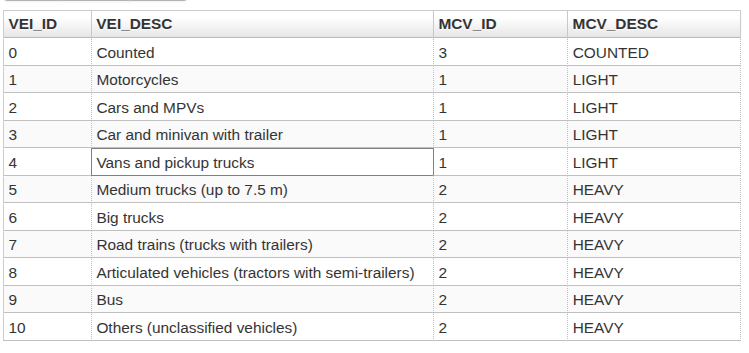

In [46]:
mapping = {
    0: 'Others', # Aggregated
    1: 'Light', 
    2: 'Light',
    3: 'Light',
    4: 'Light',
    5: 'Medium',
    6: 'Heavy',
    7: 'Heavy',
    8: 'Heavy',
    9: 'Heavy',
    10: 'Others', # unclassified
}

In [ ]:
df_regional = pd.read_csv('../data/traffic_data/regional_traffic_count_cleaned.csv', sep=';')


In [47]:
df_regional['VehicleClassification'] = df_regional.VehicleType.map(mapping)

In [31]:
df_regional.head()

,datetime,MTSStationID,DirectionCode,VehicleType,TransitCount,VehicleClassification
0,2024-01-01 00:00:00,152,0,2,367,Light
1,2024-01-01 00:00:00,152,0,4,6,Light
2,2024-01-01 00:00:00,152,0,5,1,Medium
3,2024-01-01 00:00:00,152,0,9,1,Heavy
4,2024-01-01 00:00:00,152,1,2,489,Light


In [48]:
df_regional_classified = (df_regional
    .groupby(['datetime', 'MTSStationID', 'DirectionCode', 'VehicleClassification'])
    ['TransitCount']
    .sum()
    .unstack('VehicleClassification', fill_value=0)
    .reset_index()
)

In [58]:
df_regional

,datetime,MTSStationID,DirectionCode,VehicleType,TransitCount,VehicleClassification
0,2024-01-01 00:00:00,152,0,2,367,Light
1,2024-01-01 00:00:00,152,0,4,6,Light
2,2024-01-01 00:00:00,152,0,5,1,Medium
3,2024-01-01 00:00:00,152,0,9,1,Heavy
4,2024-01-01 00:00:00,152,1,2,489,Light
...,...,...,...,...,...,...
399144,2024-12-31 23:00:00,177,0,9,1,Heavy
399145,2024-12-31 23:00:00,502,0,2,36,Light
399146,2024-12-31 23:00:00,502,0,4,2,Light
399147,2024-12-31 23:00:00,502,1,2,24,Light


In [59]:
df_regional_classified


VehicleClassification,datetime,MTSStationID,DirectionCode,Heavy,Light,Medium,Others
0,2024-01-01 00:00:00,152,0,1,373,1,0
1,2024-01-01 00:00:00,152,1,0,501,1,0
2,2024-01-01 00:00:00,154,0,0,68,0,0
3,2024-01-01 00:00:00,154,1,0,76,0,0
4,2024-01-01 00:00:00,156,0,0,118,0,0
...,...,...,...,...,...,...,...
81285,2024-12-31 22:00:00,502,0,0,29,0,0
81286,2024-12-31 22:00:00,502,1,0,64,0,0
81287,2024-12-31 23:00:00,177,0,2,151,0,0
81288,2024-12-31 23:00:00,502,0,0,38,0,0


In [57]:
df_regional_classified.to_csv('../data/traffic_data/regional_traffic_count_cleaned_v2.csv', index=False)